In [2]:
import pandas as pd
import numpy as np
import seaborn as sns           
import matplotlib
import matplotlib.pyplot as plt  
import os
from sklearn import preprocessing 

%matplotlib inline     
sns.set(color_codes=True)

In [3]:
carsons_path = 'C:\\Users\\Carson\\Desktop\\cmpe351'

listings = pd.read_csv(os.path.join(carsons_path, "listings.csv"))
sum_listings = pd.read_csv(os.path.join(carsons_path, "listings summary.csv"))
sum_nbhd = pd.read_csv(os.path.join(carsons_path, "neighbourhoods summary.csv"))
sum_rev = pd.read_csv(os.path.join(carsons_path, "reviews summary.csv"))
revs = pd.read_csv(os.path.join(carsons_path, "reviews.csv"))


minimum_nights              minimum number of night stay for the listing (calendar rules may be different)
minimum_minimum_nights      the smallest minimum_night value from the calender (looking 365 nights in the future)
maximum_minimum_nights      the largest minimum_night value from the calender (looking 365 nights in the future)
minimum_nights_avg_ntm      the average minimum_night value from the calender (looking 365 nights in the future)

### RQ2: How does the minimum number of nights that customers must book affect the likelihood of a property being vacant?

In [57]:
sum_nbhd.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [94]:
sum_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,NaN,Tower Hamlets,51.523670,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3,NaN
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,NaN,Barking and Dagenham,51.534300,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1,NaN
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,NaN,Croydon,51.366460,-0.121180,Private room,50.0,2,0,NaN,NaN,3,341,0,NaN
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,NaN,Lewisham,51.487930,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0,NaN
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,NaN,Hackney,51.536800,-0.077530,Entire home/apt,NaN,7,4,2012-08-16,0.03,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91773,1017976903431440889,Rental unit in Greater London · ★New · 1 bedro...,128273288,Sarah,NaN,Tower Hamlets,51.540103,-0.023136,Entire home/apt,NaN,2,0,NaN,NaN,1,24,0,NaN
91774,1018039512532393613,Condo in Greater London · ★4.60 · 1 bedroom · ...,442111950,Aristide,NaN,Southwark,51.432549,-0.082510,Entire home/apt,68.0,3,5,2023-12-09,5.00,2,152,5,NaN
91775,1018084760269072685,Rental unit in Greater London · ★New · Studio ...,182732276,Maryum,NaN,Barnet,51.607778,-0.181691,Entire home/apt,98.0,5,0,NaN,NaN,5,344,0,NaN
91776,1018127394557572236,Rental unit in Greater London · ★New · 2 bedro...,380179680,Abigel,NaN,Newham,51.501950,0.031070,Entire home/apt,300.0,2,1,2023-11-26,1.00,3,189,1,NaN


In [58]:
sum_rev

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09
...,...,...
1649185,1040770808160963521,2023-12-08
1649186,1041221637785631813,2023-12-10
1649187,1041280679284501283,2023-12-10
1649188,1041561781096383883,2023-12-10


In [59]:
revs

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."
...,...,...,...,...,...,...
1649185,1040770808160963521,1042002487888912858,2023-12-08,455798831,Alex,Very clean and tidy
1649186,1041221637785631813,1043386480639561296,2023-12-10,156031311,Mick,Great location for exploring central London. T...
1649187,1041280679284501283,1043378576253012636,2023-12-10,268092395,Sean,I had an outstanding experience staying at Nat...
1649188,1041561781096383883,1043361203967552573,2023-12-10,546531102,Rachida,My stay was amazing I highly recommend this ap...


In [4]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
listings['host_is_superhost'].head(5)

0    f
1    f
2    t
3    f
4    f
Name: host_is_superhost, dtype: object

In [6]:
sum_nbhd.head()

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley
3,NaN,Brent
4,NaN,Bromley


In [7]:
sum_rev.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


In [8]:
revs.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [9]:
listings['minimum_minimum_nights']

0         2.0
1         2.0
2         4.0
3        14.0
4         1.0
         ... 
91773     7.0
91774     3.0
91775     1.0
91776     1.0
91777     1.0
Name: minimum_minimum_nights, Length: 91778, dtype: float64

In [10]:
listings['minimum_nights']

0         2
1         2
2         4
3        14
4         1
         ..
91773     7
91774     3
91775     1
91776     1
91777     3
Name: minimum_nights, Length: 91778, dtype: int64

In [11]:
(listings['minimum_minimum_nights']-listings['minimum_nights']).describe()

count    91777.000000
mean        -0.361627
std          9.631561
min       -997.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        364.000000
dtype: float64

In [12]:
columns = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

array([[<Axes: title={'center': 'minimum_nights'}>]], dtype=object)

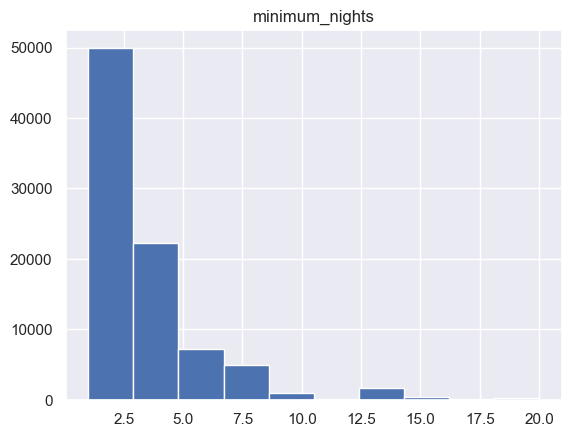

In [13]:
pd.DataFrame.hist(data = sum_listings[sum_listings['minimum_nights']<21], column='minimum_nights', bins=10)

In [14]:
sum_listings[sum_listings['minimum_nights']>21].count()

id                                3521
name                              3521
host_id                           3521
host_name                         3521
neighbourhood_group                  0
neighbourhood                     3521
latitude                          3521
longitude                         3521
room_type                         3521
price                             3381
minimum_nights                    3521
number_of_reviews                 3521
last_review                       1970
reviews_per_month                 1970
calculated_host_listings_count    3521
availability_365                  3521
number_of_reviews_ltm             3521
license                              0
dtype: int64

In [15]:
dud_listings =listings[listings['minimum_nights']<21]

min_nights = dud_listings['minimum_nights']
avail_356 = dud_listings['availability_365']
avail_90 = dud_listings['availability_90']
avail_60 = dud_listings['availability_60']
avail_30 = dud_listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

-0.01777665863703026
-0.027009241761443786
-0.027039518758866562
-0.017033694676708167


In [16]:
listings = listings[listings['host_is_superhost'] == 't']
len(listings)

15120

In [17]:
dud_listings =listings[listings['minimum_nights']>100]

min_nights = dud_listings['minimum_nights']
avail_356 = dud_listings['availability_365']
avail_90 = dud_listings['availability_90']
avail_60 = dud_listings['availability_60']
avail_30 = dud_listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

0.15802751941808477
0.16671612266456823
0.036522305979628
0.061692515283451294


does not appear to be a substantial correlation between number of minimum nights and availability


In [18]:
unbooked = listings[listings['availability_365'] > 3]
unbooked

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
6,96052,https://www.airbnb.com/rooms/96052,20231210055232,2023-12-10,city scrape,Condo in London · ★4.82 · 2 bedrooms · 1 bed ·...,NaN,"Residential, quiet and green neighbourhood wit...",https://a0.muscache.com/pictures/airflow/Hosti...,448154,...,4.90,4.45,4.70,NaN,f,2,0,2,0,0.52
8,390987,https://www.airbnb.com/rooms/390987,20231210055232,2023-12-10,city scrape,Home in London · ★4.73 · 8 bedrooms · 1 bed · ...,NaN,The neighbourhood is safe and many new cafes a...,https://a0.muscache.com/pictures/8841768/8130b...,1955537,...,4.83,4.75,4.75,NaN,f,3,0,3,0,0.09
12,117203,https://www.airbnb.com/rooms/117203,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.86 · 1 bedroom · 1 ...,NaN,For the lovers of long walks or bike rides - ...,https://a0.muscache.com/pictures/d2e37be3-d606...,255103,...,4.93,4.54,4.72,NaN,f,1,1,0,0,0.59
22,843488,https://www.airbnb.com/rooms/843488,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.88 · 1 bedroom · 1 ...,NaN,High Street Kensington 12 minutes walk. Hollan...,https://a0.muscache.com/pictures/e3898b21-7c87...,1965214,...,5.00,4.75,5.00,NaN,f,1,0,1,0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91741,937610241948170012,https://www.airbnb.com/rooms/937610241948170012,20231210055232,2023-12-11,city scrape,Home in Greater London · ★4.83 · 3 bedrooms · ...,NaN,Popular and trendy neighbourhood surrounded by...,https://a0.muscache.com/pictures/miso/Hosting-...,282569271,...,5.00,4.50,4.83,NaN,t,6,6,0,0,1.45
91743,939590573238588626,https://www.airbnb.com/rooms/939590573238588626,20231210055232,2023-12-10,city scrape,Home in Greater London · ★5.0 · 1 bedroom · 1 ...,NaN,This is an artsy hipster neighbourhood with go...,https://a0.muscache.com/pictures/miso/Hosting-...,2266385,...,5.00,5.00,5.00,NaN,f,3,0,3,0,1.30
91744,939603500360637137,https://www.airbnb.com/rooms/939603500360637137,20231210055232,2023-12-11,city scrape,Home in Greater London · ★4.63 · 3 bedrooms · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,124763657,...,4.63,4.75,4.75,NaN,f,1,1,0,0,1.73
91748,942060370650034915,https://www.airbnb.com/rooms/942060370650034915,20231210055232,2023-12-10,city scrape,Condo in Greater London · ★5.0 · 1 bedroom · 1...,NaN,This room with private en-suite toilet is perf...,https://a0.muscache.com/pictures/miso/Hosting-...,1877401,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.54


In [19]:
one_night = listings[listings['minimum_nights'] == 1]
print(len(one_night))
one_night = one_night[one_night['availability_365']>3]
one_night

3740


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
24,874463,https://www.airbnb.com/rooms/874463,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.82 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/89283215/d8e6...,4616179,...,4.88,4.76,4.70,NaN,f,2,0,2,0,0.79
54,1562712,https://www.airbnb.com/rooms/1562712,20231210055232,2023-12-10,city scrape,Bed and breakfast in Greater London · ★4.87 · ...,NaN,Crystal Palace ground at Selhurst Park is 40 m...,https://a0.muscache.com/pictures/miso/Hosting-...,6014741,...,4.92,4.84,4.88,NaN,f,1,0,1,0,8.55
70,6050854,https://www.airbnb.com/rooms/6050854,20231210055232,2023-12-10,city scrape,Home in London · ★4.65 · 1 bedroom · 1 bed · 1...,NaN,NaN,https://a0.muscache.com/pictures/e1cce1e7-7088...,16774103,...,4.76,4.49,4.68,NaN,f,4,0,4,0,0.68
97,2729885,https://www.airbnb.com/rooms/2729885,20231210055232,2023-12-11,city scrape,Condo in London · ★4.85 · 1 bedroom · 1 bed · ...,NaN,London is literally on your doorstep! <br />2-...,https://a0.muscache.com/pictures/3e482895-1fec...,2369445,...,4.96,4.99,4.79,NaN,f,3,1,2,0,3.43
123,6860603,https://www.airbnb.com/rooms/6860603,20231210055232,2023-12-10,city scrape,Townhouse in London · ★4.46 · 1 bedroom · 5 be...,NaN,"We live in a quiet, leafy, residential neighbo...",https://a0.muscache.com/pictures/71a50f9f-b1da...,34109076,...,4.70,4.38,4.54,NaN,t,4,0,4,0,2.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91696,917731767594102094,https://www.airbnb.com/rooms/917731767594102094,20231210055232,2023-12-10,city scrape,Home in Greater London · ★5.0 · 1 bedroom · 1 ...,NaN,"Feltham, United Kingdom <br />Close to all ame...",https://a0.muscache.com/pictures/hosting/Hosti...,35717855,...,5.00,4.63,4.75,NaN,f,3,0,3,0,2.70
91699,918735895845426696,https://www.airbnb.com/rooms/918735895845426696,20231210055232,2023-12-10,city scrape,Home in Greater London · 1 bedroom · 1 bed · 1...,NaN,NaN,https://a0.muscache.com/pictures/731d98e6-5d79...,64504375,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.53
91701,920865736201863646,https://www.airbnb.com/rooms/920865736201863646,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · ★4.93 · 1 bedr...,NaN,Kentish Town is a beautiful area with many hid...,https://a0.muscache.com/pictures/miso/Hosting-...,7679576,...,4.93,4.93,4.86,NaN,f,4,1,3,0,2.69
91736,936268160482977868,https://www.airbnb.com/rooms/936268160482977868,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/e4a63027-120e...,35816183,...,1.00,2.00,3.00,NaN,t,5,3,2,0,0.63


array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

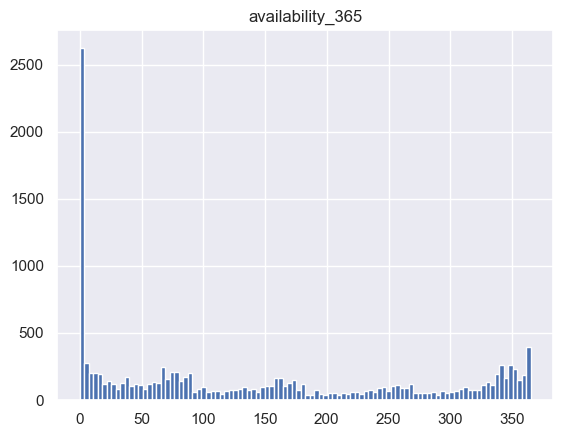

In [20]:
pd.DataFrame.hist(data = listings[listings['minimum_nights']<7], column='availability_365', bins=100)


array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

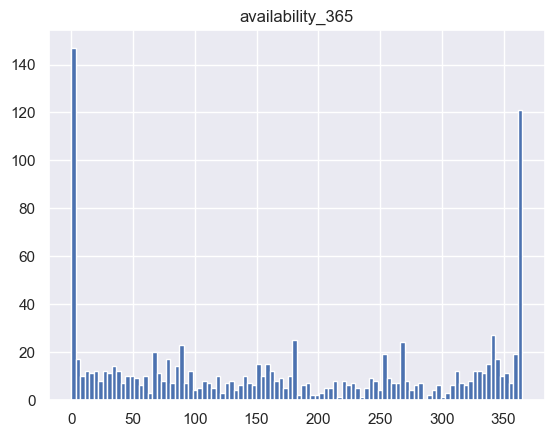

In [21]:
pd.DataFrame.hist(data = listings[listings['minimum_nights']>7], column='availability_365', bins=100)

In [22]:
more_than_a_week = listings[listings['minimum_nights']>7]
abs(len(more_than_a_week[more_than_a_week['availability_365']>3]) - len(more_than_a_week))/len(more_than_a_week)

0.12883435582822086

In [23]:
less_than_a_week = listings[listings['minimum_nights']<7]
abs(len(less_than_a_week[less_than_a_week['availability_365']<30]) - len(less_than_a_week))/len(less_than_a_week)

0.7087597832630945

## Find correlations between vacancy and factors while only looking at datapoints that exist in the middle of the set. i.e exclude all and no vacancy

array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

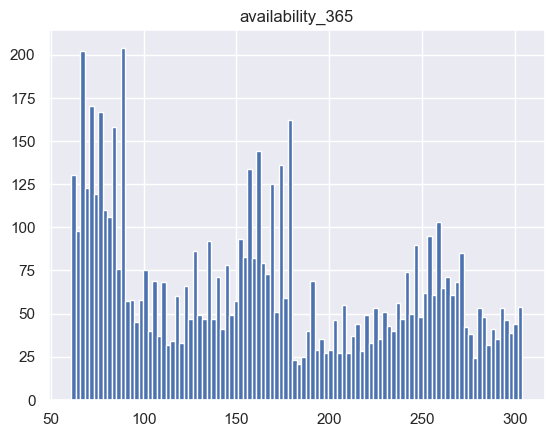

In [60]:
df_small = listings[listings['availability_365'] > 60 ]
df_small = df_small[df_small['availability_365'] < 305 ]
pd.DataFrame.hist(data = df_small, column='availability_365', bins=100)


In [36]:
numeric_cols = df_small.select_dtypes(include=['number'])

df_small = df_small.drop(columns=df_small.select_dtypes(exclude=['number']).columns)

In [37]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

for col in cols:
    if abs(df_small['availability_365'].corr(df_small[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_small['availability_365'].corr(df_small[col]))

column:  accommodates
correlation:  0.11039706939195135
column:  maximum_nights
correlation:  0.10996293766271424
column:  availability_365
correlation:  0.9999999999999998


c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


these are not promising results, attempt to try classification model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# listings
non_numeric_cols = listings.select_dtypes(exclude=['number'])
data = listings.drop(columns=listings.select_dtypes(include=['number']).columns)
cols_to_drop = ['last_scraped','amenities','listing_url', 'source', 'name','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_about','host_thumbnail_url', 'host_picture_url','bathrooms_text','calendar_last_scraped', 'first_review', 'last_review']
data = data.drop(columns=cols_to_drop)

data = pd.get_dummies(data)

# Split the data into features (X) and target (y)
# X = data.drop('Target_Yes', axis=1)  # Features
# y = df['Target_Yes']  # Target variable

In [51]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, listings['availability_365'], test_size=0.2, random_state=42)

# Create a logistic regression model
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.13921957671957672


a preliminary attempt to use categorical variables does not yield promising results either, try again with smaller df

In [54]:
df_small = listings[listings['availability_365'] > 60 ]
df_small = df_small[df_small['availability_365'] < 305 ]
non_numeric_cols = df_small.select_dtypes(exclude=['number'])
data = df_small.drop(columns=df_small.select_dtypes(include=['number']).columns)
print(data.columns)
cols_to_drop = ['last_scraped','amenities','listing_url', 'source', 'name','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_about','host_thumbnail_url', 'host_picture_url','bathrooms_text','calendar_last_scraped', 'first_review', 'last_review']
data = data.drop(columns=cols_to_drop)

data = pd.get_dummies(data)

# Split the data into features (X) and target (y)
# X = data.drop('Target_Yes', axis=1)  # Features
# y = df['Target_Yes']  # Target variable

Index(['listing_url', 'last_scraped', 'source', 'name',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, df_small['availability_365'], test_size=0.2, random_state=42)

# Create a logistic regression model
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.01855976243504083


did wayyyy worse, that is also bad

array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

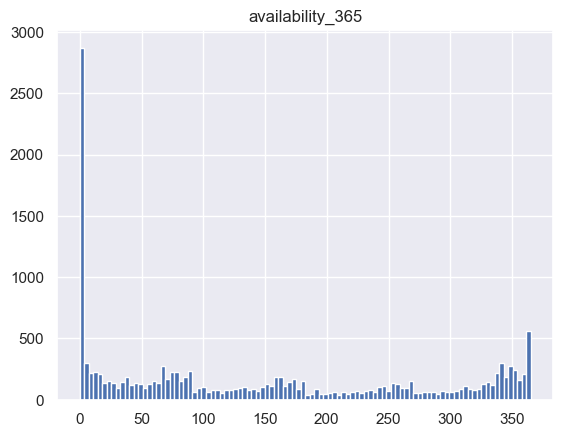

In [65]:
pd.DataFrame.hist(data = listings, column='availability_365', bins=100)

## Observe there is some recurrence here, at pseudo approximate intervals there is some normality, attempt to extract this

array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

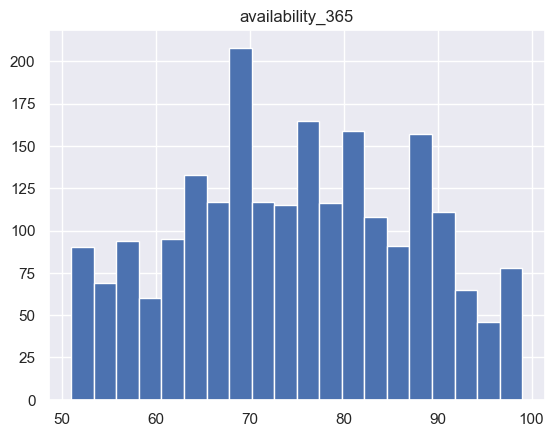

In [69]:
df_50_to_100 = listings[listings['availability_365'] > 50 ]
df_50_to_100 = df_50_to_100[df_50_to_100['availability_365'] < 100 ]
pd.DataFrame.hist(data = df_50_to_100, column='availability_365', bins=20)

array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

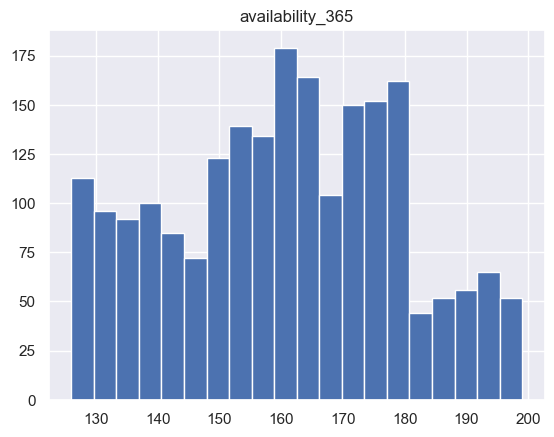

In [70]:
df_125_to_200 = listings[listings['availability_365'] > 125 ]
df_125_to_200 = df_125_to_200[df_125_to_200['availability_365'] < 200 ]
pd.DataFrame.hist(data = df_125_to_200, column='availability_365', bins=20)

array([[<Axes: title={'center': 'availability_365'}>]], dtype=object)

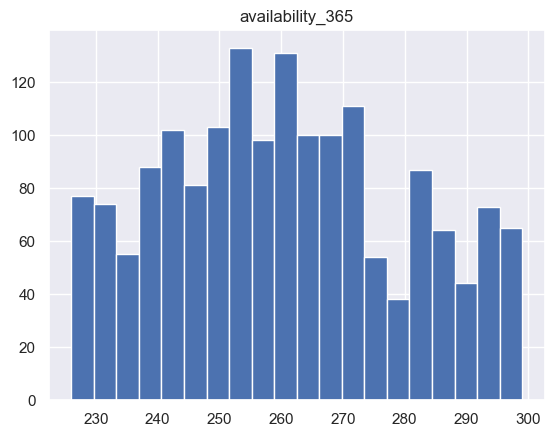

In [71]:
df_225_to_300 = listings[listings['availability_365'] > 225 ]
df_225_to_300 = df_225_to_300[df_225_to_300['availability_365'] < 300 ]
pd.DataFrame.hist(data = df_225_to_300, column='availability_365', bins=20)

not quite as normal as expected, will still look into correlations

In [72]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


for col in cols:
    if abs(df_50_to_100['availability_365'].corr(df_50_to_100[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_50_to_100['availability_365'].corr(df_50_to_100[col]))

column:  availability_30
correlation:  0.2754392945053159
column:  availability_60
correlation:  0.1661351446577897
column:  availability_90
correlation:  0.14240869947969456
column:  availability_365
correlation:  0.9999999999999999
column:  number_of_reviews_l30d
correlation:  -0.10421115312931419


c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [73]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

for col in cols:
    if abs(df_125_to_200['availability_365'].corr(df_125_to_200[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_125_to_200['availability_365'].corr(df_125_to_200[col]))

column:  host_listings_count
correlation:  -0.1547405345481339
column:  host_total_listings_count
correlation:  -0.20548625683468105
column:  maximum_minimum_nights
correlation:  -0.14344169302078424
column:  minimum_nights_avg_ntm
correlation:  -0.13789157204893426
column:  availability_30
correlation:  0.2227811492686982
column:  availability_60
correlation:  0.13584494054460616
column:  availability_365
correlation:  1.0
column:  calculated_host_listings_count
correlation:  -0.14952647237755862
column:  calculated_host_listings_count_entire_homes
correlation:  -0.14515926411530403
column:  calculated_host_listings_count_shared_rooms
correlation:  -0.2204562356511166


c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Carson\miniforge3\envs\cmpe351\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [74]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


for col in cols:
    if abs(df_225_to_300['availability_365'].corr(df_225_to_300[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_225_to_300['availability_365'].corr(df_225_to_300[col]))

column:  availability_365
correlation:  1.0


no bueno, lets try to extract some date features

In [90]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [93]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
6,96052,https://www.airbnb.com/rooms/96052,20231210055232,2023-12-10,city scrape,Condo in London · ★4.82 · 2 bedrooms · 1 bed ·...,NaN,"Residential, quiet and green neighbourhood wit...",https://a0.muscache.com/pictures/airflow/Hosti...,448154,...,4.90,4.45,4.70,NaN,f,2,0,2,0,0.52
8,390987,https://www.airbnb.com/rooms/390987,20231210055232,2023-12-10,city scrape,Home in London · ★4.73 · 8 bedrooms · 1 bed · ...,NaN,The neighbourhood is safe and many new cafes a...,https://a0.muscache.com/pictures/8841768/8130b...,1955537,...,4.83,4.75,4.75,NaN,f,3,0,3,0,0.09
12,117203,https://www.airbnb.com/rooms/117203,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.86 · 1 bedroom · 1 ...,NaN,For the lovers of long walks or bike rides - ...,https://a0.muscache.com/pictures/d2e37be3-d606...,255103,...,4.93,4.54,4.72,NaN,f,1,1,0,0,0.59
21,834616,https://www.airbnb.com/rooms/834616,20231210055232,2023-12-11,city scrape,Home in London · ★4.84 · 1 bedroom · 2 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/13403749/f6ad...,4365977,...,4.84,4.66,4.89,NaN,f,5,0,5,0,1.98


In [95]:
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'])
listings['calendar_updated'] = pd.to_datetime(listings['calendar_updated'])
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['first_review'] = pd.to_datetime(listings['first_review'])

2       2023-12-03
6       2023-11-24
8       2023-07-11
12      2023-11-19
21      2023-11-07
           ...    
91741   2023-11-26
91743   2023-10-31
91744   2023-11-04
91748   2023-10-04
91749   2023-11-28
Name: last_review, Length: 15120, dtype: datetime64[ns]

2        True
6        True
8        True
12       True
21       True
         ... 
91741    True
91743    True
91744    True
91748    True
91749    True
Name: has_availability, Length: 15120, dtype: bool